<a href="https://colab.research.google.com/github/kingsfall/covid-fastAI/blob/master/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import math
from fastai.vision import *
from google.colab import files

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! pip install -q kaggle

In [0]:
! mkdir -p /root/.kaggle/
! cp kaggle.json /root/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json
path = Config.data_path()/'CoronaHack'
path.mkdir(parents=True, exist_ok=True)

In [21]:
! kaggle datasets download -d praveengovi/coronahack-chest-xraydataset
! unzip -q -n /content/coronahack-chest-xraydataset.zip -d {path}

 99% 1.17G/1.19G [00:20<00:00, 56.6MB/s]
100% 1.19G/1.19G [00:20<00:00, 63.0MB/s]


In [22]:
! mv /root/.fastai/data/CoronaHack/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train /root/.fastai/data/CoronaHack/train
! mv /root/.fastai/data/CoronaHack/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test /root/.fastai/data/CoronaHack/test

%ls


Chest_xray_Corona_dataset_Summary.csv  test/
Chest_xray_Corona_Metadata.csv         test.csv
Coronahack-Chest-XRay-Dataset/         train/
coronahack-chest-xraydataset.zip       train.csv


In [23]:
import pandas as pd
from numpy import nan

%cd /root/.fastai/data/CoronaHack
! rm -R Coronahack-Chest-XRay-Dataset
df = pd.read_csv('Chest_xray_Corona_Metadata.csv')

/root/.fastai/data/CoronaHack


In [24]:
df.loc[(df.Label == 'Pnemonia') & (df.Label_2_Virus_category == 'ARDS')] = df.loc[(df.Label == 'Pnemonia') & (df.Label_2_Virus_category == 'ARDS')].replace(
    "Pnemonia", "ARDS (Stress-Smoking)")
df.loc[(df.Label == 'Pnemonia') & (df.Label_2_Virus_category == 'COVID-19')] = df.loc[(df.Label == 'Pnemonia') & (df.Label_2_Virus_category == 'COVID-19')].replace(
    "Pnemonia", "COVID-19 (Virus)")
df.loc[(df.Label == 'Pnemonia') & (df.Label_2_Virus_category == 'SARS')] = df.loc[(df.Label == 'Pnemonia') & (df.Label_2_Virus_category == 'SARS')].replace(
    "Pnemonia", "SARS (Virus)")
df.loc[(df.Label == 'Pnemonia') & (df.Label_1_Virus_category == 'Virus')] = df.loc[(df.Label == 'Pnemonia') & (df.Label_1_Virus_category == 'Virus')].replace(
    "Pnemonia", "Pnemonia (Virus)")
df.loc[(df.Label == 'Pnemonia') & (df.Label_1_Virus_category == 'bacteria')] = df.loc[(df.Label == 'Pnemonia') & (df.Label_1_Virus_category == 'bacteria')].replace(
    "Pnemonia", "Pnemonia (bacteria)")

print(df.groupby("Label").count())

                       Unnamed: 0  ...  Label_1_Virus_category
Label                              ...                        
ARDS (Stress-Smoking)           2  ...                       2
COVID-19 (Virus)               58  ...                      58
Normal                       1576  ...                       0
Pnemonia (Virus)             1493  ...                    1493
Pnemonia (bacteria)          2777  ...                    2777
SARS (Virus)                    4  ...                       4

[6 rows x 5 columns]


In [0]:
df = df.loc[:,["X_ray_image_name","Label"]]

In [26]:
from random import seed
from random import random
seed(42)

# df_gb = groupby
df_gb = df.groupby("Label").count()
df_gb = df_gb.reset_index()
df_gb["Test Qty"] = 0

for row in range(len(df_gb)):
    labelQty = int(df_gb["X_ray_image_name"][row])
    testQty = int(round(labelQty * 0.2))
    df_gb["Test Qty"][row] = testQty

df_test = pd.DataFrame(columns=["X_ray_image_name", "Label"])

for row in range(len(df_gb)):
    dfTemp = pd.DataFrame()
    looplength = df_gb["Test Qty"][row]
    label = df_gb["Label"][row]

    for index in range(looplength):
        dfTemp = df
        dfTemp = dfTemp.loc[df.Label == label]
        randomValue = random()
        rowIndex = list(dfTemp.index)[int(len(dfTemp)*randomValue)-1]
        testRow = pd.DataFrame(
            {"X_ray_image_name": df["X_ray_image_name"][rowIndex], "Label": df["Label"][rowIndex]}, index=[0])
        df_test = df_test.append(testRow)
        df = df.drop(rowIndex)

df_test = df_test.reset_index().drop(columns="index")

print(df.shape, df_test.shape)
print(df.head(), df_test.head())


(4728, 2) (1182, 2)
    X_ray_image_name   Label
0  IM-0128-0001.jpeg  Normal
1  IM-0127-0001.jpeg  Normal
2  IM-0125-0001.jpeg  Normal
4  IM-0119-0001.jpeg  Normal
5  IM-0117-0001.jpeg  Normal                             X_ray_image_name             Label
0    41591_2020_819_Fig1_HTML.webp-day10.png  COVID-19 (Virus)
1                    kjr-21-e25-g001-l-a.jpg  COVID-19 (Virus)
2  E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg  COVID-19 (Virus)
3  F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg  COVID-19 (Virus)
4   23E99E2E-447C-46E5-8EB2-D35D12473C39.png  COVID-19 (Virus)


In [0]:
df.to_csv('train.csv',index=False)
df_test.to_csv('test.csv',index=False)

In [32]:
%cd /root/.fastai/data/CoronaHack/test
! mv *jpeg /root/.fastai/data/CoronaHack/train
%cd /root/.fastai/data/CoronaHack
! rm -R test

/root/.fastai/data/CoronaHack/test
mv: cannot stat '*jpeg': No such file or directory
/root/.fastai/data/CoronaHack


In [0]:
%ls /root/.fastai/data/CoronaHack/train

In [0]:
%ls /root/.fastai/data/CoronaHack/test

In [0]:
np.random.seed(42)
path = Path('/root/.fastai/data/CoronaHack')
data = (ImageList.from_csv(path,'train.csv',folder='train').split_by_rand_pct().label_from_df().transform(size=128).databunch().normalize(imagenet_stats))

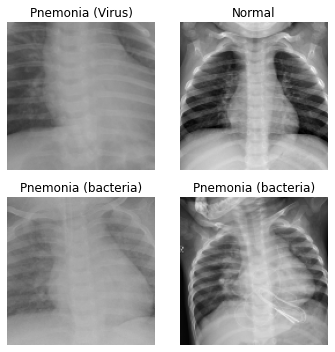

In [35]:
import warnings
warnings.filterwarnings('ignore')
data.show_batch(rows=2, figsize=(5,5))

In [36]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [37]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.584087,0.852484,0.274074,02:16
1,1.030373,0.586942,0.225397,02:16
2,0.711964,0.545171,0.213757,02:15
3,0.550580,0.535667,0.210582,02:15


In [0]:
learn.save('stage-1')

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

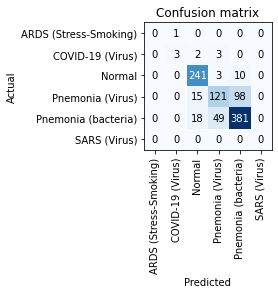

In [40]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


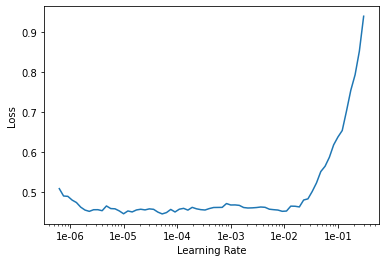

In [41]:
learn.load('stage-1')
learn.lr_find()
learn.recorder.plot()

In [42]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.679638,0.546532,0.207407,02:14
1,0.441628,0.478322,0.180952,02:14


In [0]:
learn.export()

In [44]:
%ls -l --block-size=M

total 1301M
-rw-r--r-- 1 root root    1M Mar 20 01:27 Chest_xray_Corona_dataset_Summary.csv
-rw-r--r-- 1 root root    1M Mar 20 01:27 Chest_xray_Corona_Metadata.csv
-rw-r--r-- 1 root root 1217M Jun 12 17:14 coronahack-chest-xraydataset.zip
-rw-r--r-- 1 root root   84M Jun 12 17:36 export.pkl
drwxr-xr-x 2 root root    1M Jun 12 17:28 models/
-rw-r--r-- 1 root root    1M Jun 12 17:14 test.csv
drwxr-xr-x 2 root root    1M Jun 12 17:15 train/
-rw-r--r-- 1 root root    1M Jun 12 17:14 train.csv


In [0]:
# ! mkdir -p /content/gdrive/My\ Drive/Colab\ Notebooks/COVID-Model/
! cp export.pkl /content/drive/My\ Drive/Colab\ Notebooks/COVID-Model/'export.pkl'

In [0]:
# np.random.seed(42)
# testData = (ImageList.from_csv(path_testData,'test.csv',folder='test'))
# learn = load_learner(path_testModel,'export.pkl',test= testData)

In [0]:
path_testModel = Path('/content/drive/My Drive/Colab Notebooks/COVID-Model/')
learn = load_learner(path_testModel,'export.pkl')

In [0]:
df_test = pd.read_csv('/root/.fastai/data/CoronaHack/test.csv')
df_test["Prediction"] = ""
df_test["Result"] = ""

for row in df_test.iterrows():
  index = row[1]["X_ray_image_name"]
  img = open_image(f"/root/.fastai/data/CoronaHack/train/{index}")
  cat, tensor, probs = learn.predict(img)
  row[1]["Prediction"] = str(cat)
  if row[1]["Prediction"] == row[1]["Label"]:
    row[1]["Result"] = 1
  else:
    row[1]["Result"] = 0


In [61]:
arrayLabel = list(df_test.groupby("Label").count().reset_index()["Label"])
arrayPrediction = list(df_test.groupby("Label").sum().reset_index()["Result"])
arrayTotal = list(df_test.groupby("Label").count().reset_index()["Result"])
print(arrayLabel,arrayPrediction,arrayTotal)

['COVID-19 (Virus)', 'Normal', 'Pnemonia (Virus)', 'Pnemonia (bacteria)', 'SARS (Virus)'] [8, 291, 188, 463, 0] [12, 315, 299, 555, 1]


In [0]:
testResultDict = {}
for index in range(len(arrayTotal)):
      testResultDict.update({arrayLabel[index]: arrayPrediction[index]/arrayTotal[index]})


In [63]:
testResultDict

{'COVID-19 (Virus)': 0.6666666666666666,
 'Normal': 0.9238095238095239,
 'Pnemonia (Virus)': 0.6287625418060201,
 'Pnemonia (bacteria)': 0.8342342342342343,
 'SARS (Virus)': 0.0}